<a href="https://colab.research.google.com/github/jonathan-farah/MLDemographics/blob/main/MainTIMESFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lag-Llama: Towards Foundation Models for Probabilistic Time Series Forecasting

![lag-llama-architecture](https://raw.githubusercontent.com/time-series-foundation-models/lag-llama/main/images/lagllama.webp)

Lag-Llama is the <b>first open-source foundation model for time series forecasting</b>!

[[Tweet Thread](https://twitter.com/arjunashok37/status/1755261111233114165)] [[Model Weights](https://huggingface.co/time-series-foundation-models/Lag-Llama)] [[Colab Demo on Zero-Shot Forecasting](https://colab.research.google.com/drive/1XxrLW9VGPlZDw3efTvUi0hQimgJOwQG6?usp=sharing)] [[GitHub](https://github.com/time-series-foundation-models/lag-llama)] [[Paper](https://arxiv.org/abs/2310.08278)]

💫 This Colab Demo shows you how to use the pretrained Lag-Llama model to get zero-shot predictions on time series, with the ability to load time series of different formats.


# Updates

## Update 05/Apr

Added section at the end on the importance of tuning the context length.


## Update 07/Mar

We have released a preliminary [Colab Demo 2](https://colab.research.google.com/drive/1uvTmh-pe1zO5TeaaRVDdoEWJ5dFDI-pA?usp=sharing) for finetuning. A detailed demo with instructions for benchmarking is coming soon along with the tutorial.

Note that Colab Demo 2 is for finetuning, while Colab Demo 1 (this Colab) is for zero-shot forecasting.

## Update 17/Feb

This Colab demo 1 for zero-shot forecasting is an update to the [previous Colab demo 1](https://colab.research.google.com/drive/13HHKYL_HflHBKxDWycXgIUAHSeHRR5eo?usp=sharing). In this notebook, we show **how one can load time series in different formats**.

If your time series is of a format that is not described here, please create [an issue in our GitHub repository](https://github.com/time-series-foundation-models/lag-llama/issues), and we can discuss how to load it.

-------


**Please make a copy of this notebook if you would like to save your changes (File -> Save a copy in ...)**

# Prepare the repository

We first clone and install the required packages from the [GitHub repository](https://github.com/time-series-foundation-models/lag-llama/) that has the Lag-Llama architecture.



In [ ]:
!git clone https://github.com/time-series-foundation-models/lag-llama/

Cloning into 'lag-llama'...
remote: Enumerating objects: 486, done.
remote: Counting objects: 100% (324/324), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 486 (delta 209), reused 260 (delta 169), pack-reused 162 (from 1)
Receiving objects: 100% (486/486), 271.18 KiB | 1.33 MiB/s, done.
Resolving deltas: 100% (250/250), done.


In [ ]:
cd /content/lag-llama

/content/lag-llama


In [ ]:
!pip install -r requirements.txt --quiet # this could take some time # ignore the errors displayed by colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 6.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
mizani 0.13.0 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.


We then download our pretrained model weights from [HuggingFace](https://huggingface.co/time-series-foundation-models/Lag-Llama) 🤗

In [ ]:
!huggingface-cli download time-series-foundation-models/Lag-Llama lag-llama.ckpt --local-dir /content/lag-llama

lag-llama.ckpt: 100% 29.5M/29.5M [00:00<00:00, 37.7MB/s]
Download complete. Moving file to /content/lag-llama/lag-llama.ckpt
/content/lag-llama/lag-llama.ckpt


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from itertools import islice
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import torch
from gluonts.evaluation import make_evaluation_predictions
from gluonts.dataset.pandas import PandasDataset
from datasets import load_dataset
import pandas as pd
from lag_llama.gluon.estimator import LagLlamaEstimator

In [ ]:
from itertools import islice
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import torch
from gluonts.evaluation import make_evaluation_predictions
from gluonts.dataset.pandas import PandasDataset
from datasets import load_dataset
import pandas as pd
from lag_llama.gluon.estimator import LagLlamaEstimator

# List of states
states = ["Alabama", "California", "Texas", "NewYork", "Hawaii", "Wyoming"]

# Dictionary to store datasets
datasets = {}
train_datasets={}

for state in states:
    # Load dataset for each state
    df = load_dataset(f"AdityaA44/MonthlyRacepopulation{state}", split='train').to_pandas()

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Adjust the format if necessary

    # Melt dataframe to long format
    df = df.melt(id_vars='Date', var_name='type_id', value_name='population')

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Convert numerical columns to float32
    for col in df.columns:
        if df[col].dtype != 'object' and pd.api.types.is_string_dtype(df[col]) == False:
            df[col] = df[col].astype('float32')

    # Create the LagLlama dataset object
    dataset = PandasDataset.from_long_dataframe(df,
                                                target="population",
                                                item_id="type_id",
                                                freq="M")





    train_end=round(len(df)*1.0)
    train_dataset = PandasDataset.from_long_dataframe(df[:train_end],
                                                target="population",
                                                item_id="type_id",
                                                freq="M")
    train_datasets[state]=train_dataset

    # Store dataset in dictionary
    datasets[state] = dataset
    print(df)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


(…)onthly_population_data_all_races (2).csv:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/385 [00:00<?, ? examples/s]

                                               type_id    population
Date                                                                
1990-01-01                                       White  2.987764e+06
1990-02-01                                       White  2.990325e+06
1990-03-01                                       White  2.992650e+06
1990-04-01                                       White  2.995238e+06
1990-05-01                                       White  2.997755e+06
...                                                ...           ...
2021-09-01  Native Hawaiian and Other Pacific Islander  3.348601e+03
2021-10-01  Native Hawaiian and Other Pacific Islander  3.723398e+03
2021-11-01  Native Hawaiian and Other Pacific Islander  4.131737e+03
2021-12-01  Native Hawaiian and Other Pacific Islander  4.542235e+03
2022-01-01  Native Hawaiian and Other Pacific Islander  4.977000e+03

[1925 rows x 2 columns]


(…)onthly_population_data_all_races (1).csv:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/385 [00:00<?, ? examples/s]

                                               type_id    population
Date                                                                
1990-01-01                                       White  2.435424e+07
1990-02-01                                       White  2.438174e+07
1990-03-01                                       White  2.440653e+07
1990-04-01                                       White  2.443393e+07
1990-05-01                                       White  2.446039e+07
...                                                ...           ...
2021-09-01  Native Hawaiian and Other Pacific Islander  1.493435e+05
2021-10-01  Native Hawaiian and Other Pacific Islander  1.496021e+05
2021-11-01  Native Hawaiian and Other Pacific Islander  1.498932e+05
2021-12-01  Native Hawaiian and Other Pacific Islander  1.501967e+05
2022-01-01  Native Hawaiian and Other Pacific Islander  1.505310e+05

[1925 rows x 2 columns]


(…)onthly_population_data_all_races (1).csv:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/385 [00:00<?, ? examples/s]

                                               type_id    population
Date                                                                
1990-01-01                                       White  1.459628e+07
1990-02-01                                       White  1.461868e+07
1990-03-01                                       White  1.463899e+07
1990-04-01                                       White  1.466158e+07
1990-05-01                                       White  1.468354e+07
...                                                ...           ...
2021-09-01  Native Hawaiian and Other Pacific Islander  2.597360e+04
2021-10-01  Native Hawaiian and Other Pacific Islander  2.628496e+04
2021-11-01  Native Hawaiian and Other Pacific Islander  2.662767e+04
2021-12-01  Native Hawaiian and Other Pacific Islander  2.697615e+04
2022-01-01  Native Hawaiian and Other Pacific Islander  2.735000e+04

[1925 rows x 2 columns]


(…)onthly_population_data_all_races (1).csv:   0%|          | 0.00/36.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/385 [00:00<?, ? examples/s]

                                               type_id    population
Date                                                                
1990-01-01                                       White  1.415991e+07
1990-02-01                                       White  1.416000e+07
1990-03-01                                       White  1.416023e+07
1990-04-01                                       White  1.416063e+07
1990-05-01                                       White  1.416116e+07
...                                                ...           ...
2021-09-01  Native Hawaiian and Other Pacific Islander  9.121300e+03
2021-10-01  Native Hawaiian and Other Pacific Islander  9.120744e+03
2021-11-01  Native Hawaiian and Other Pacific Islander  9.120329e+03
2021-12-01  Native Hawaiian and Other Pacific Islander  9.120086e+03
2022-01-01  Native Hawaiian and Other Pacific Islander  9.120000e+03

[1925 rows x 2 columns]


(…)ii_monthly_population_data_all_races.csv:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/385 [00:00<?, ? examples/s]

                                               type_id     population
Date                                                                 
1990-01-01                                       White  377435.000000
1990-02-01                                       White  378013.968750
1990-03-01                                       White  378526.375000
1990-04-01                                       White  379081.250000
1990-05-01                                       White  379605.125000
...                                                ...            ...
2021-09-01  Native Hawaiian and Other Pacific Islander  152521.125000
2021-10-01  Native Hawaiian and Other Pacific Islander  152197.828125
2021-11-01  Native Hawaiian and Other Pacific Islander  151798.421875
2021-12-01  Native Hawaiian and Other Pacific Islander  151343.421875
2022-01-01  Native Hawaiian and Other Pacific Islander  150797.000000

[1925 rows x 2 columns]


(…)ng_monthly_population_data_all_races.csv:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/385 [00:00<?, ? examples/s]

                                               type_id     population
Date                                                                 
1990-01-01                                       White  377435.000000
1990-02-01                                       White  386304.843750
1990-03-01                                       White  394166.000000
1990-04-01                                       White  402609.625000
1990-05-01                                       White  410428.468750
...                                                ...            ...
2021-09-01  Native Hawaiian and Other Pacific Islander     526.524597
2021-10-01  Native Hawaiian and Other Pacific Islander     549.940918
2021-11-01  Native Hawaiian and Other Pacific Islander     576.595276
2021-12-01  Native Hawaiian and Other Pacific Islander     604.685974
2022-01-01  Native Hawaiian and Other Pacific Islander     636.000000

[1925 rows x 2 columns]


In [ ]:
def get_lag_llama_predictions(dataset, prediction_length, device, context_length=32, use_rope_scaling=False, num_samples=100):
    # Load model checkpoint
    ckpt = torch.load("lag-llama.ckpt", map_location=device)  # Ensure it's loaded to CPU

    estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

    rope_scaling_arguments = {
        "type": "linear",
        "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
    }

    estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length,

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        scaling=estimator_args["scaling"],
        time_feat=estimator_args["time_feat"],
        rope_scaling=rope_scaling_arguments if use_rope_scaling else None,

        batch_size=1,
        num_parallel_samples=num_samples,
        device=device,
    )

    lightning_module = estimator.create_lightning_module()
    transformation = estimator.create_transformation()
    predictor = estimator.create_predictor(transformation, lightning_module)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=num_samples
    )
    forecasts = list(forecast_it)
    tss = list(ts_it)
    return forecasts, tss


In [ ]:
prediction_length=12
context_length=64
num_samples=100
device="cpu"
ckpt = torch.load("lag-llama.ckpt", map_location=device)
estimator_args = ckpt["hyper_parameters"]["model_kwargs"]

estimator = LagLlamaEstimator(
        ckpt_path="lag-llama.ckpt",
        prediction_length=prediction_length,
        context_length=context_length,

        # distr_output="neg_bin",
        # scaling="mean",
        nonnegative_pred_samples=True,
        aug_prob=0,
        lr=5e-4,

        # estimator args
        input_size=estimator_args["input_size"],
        n_layer=estimator_args["n_layer"],
        n_embd_per_head=estimator_args["n_embd_per_head"],
        n_head=estimator_args["n_head"],
        time_feat=estimator_args["time_feat"],

        # rope_scaling={
        #     "type": "linear",
        #     "factor": max(1.0, (context_length + prediction_length) / estimator_args["context_length"]),
        # },

        batch_size=64,
        num_parallel_samples=num_samples,
        trainer_kwargs = {"max_epochs": 60,}, # <- lightning trainer arguments
    )

<ipython-input-13-5509a34cb847>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load("lag-llama.ckpt", map_location=device)


In [ ]:
predictor = estimator.train(train_dataset, cache_data=True, shuffle_buffer_length=1000)

/usr/local/lib/python3.10/dist-packages/lightning/fabric/utilities/cloud_io.py:56: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
INFO: GPU available: False, used: False
INFO:lightning.pytorc

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 9.63651 (best 9.63651), saving model to '/content/lag-llama/lightning_logs/version_3/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 9.63651 (best 9.63651), saving model to '/content/lag-llama/lightning_logs/version_3/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 8.42694 (best 8.42694), saving model to '/content/lag-llama/lightning_logs/version_3/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' reached 8.42694 (best 8.42694), saving model to '/content/lag-llama/lightning_logs/version_3/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO: Epoch 2, global step 150: 'train_loss' reached 8.03816 (best 8.03816), saving model to '/content/lag-llama/lightning_logs/version_3/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO:lightning.pytor

In [ ]:
forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_dataset,
        predictor=predictor,
        num_samples=num_samples
    )

In [ ]:
from tqdm.autonotebook import tqdm

forecasts = list(tqdm(forecast_it, total=len(dataset), desc="Forecasting batches"))

Forecasting batches:   0%|          | 0/5 [00:00<?, ?it/s]

We import the required packages and the lag llama estimator object which we can use to make predictions.

In [ ]:
tss = list(tqdm(ts_it, total=len(dataset), desc="Ground truth"))

Ground truth:   0%|          | 0/5 [00:00<?, ?it/s]

RMSE and MSE for Alabama:
Race: American Indian and Alaska Native, RMSE: 1846.9305, MSE: 3411152.4269
Race: Asian, RMSE: 1151.6449, MSE: 1326285.9698
Race: Black or African American, RMSE: 793.8063, MSE: 630128.4982
Race: Native Hawaiian and Other Pacific Islander, RMSE: 53.7828, MSE: 2892.5878
Race: White, RMSE: 23392.2578, MSE: 547197725.5665


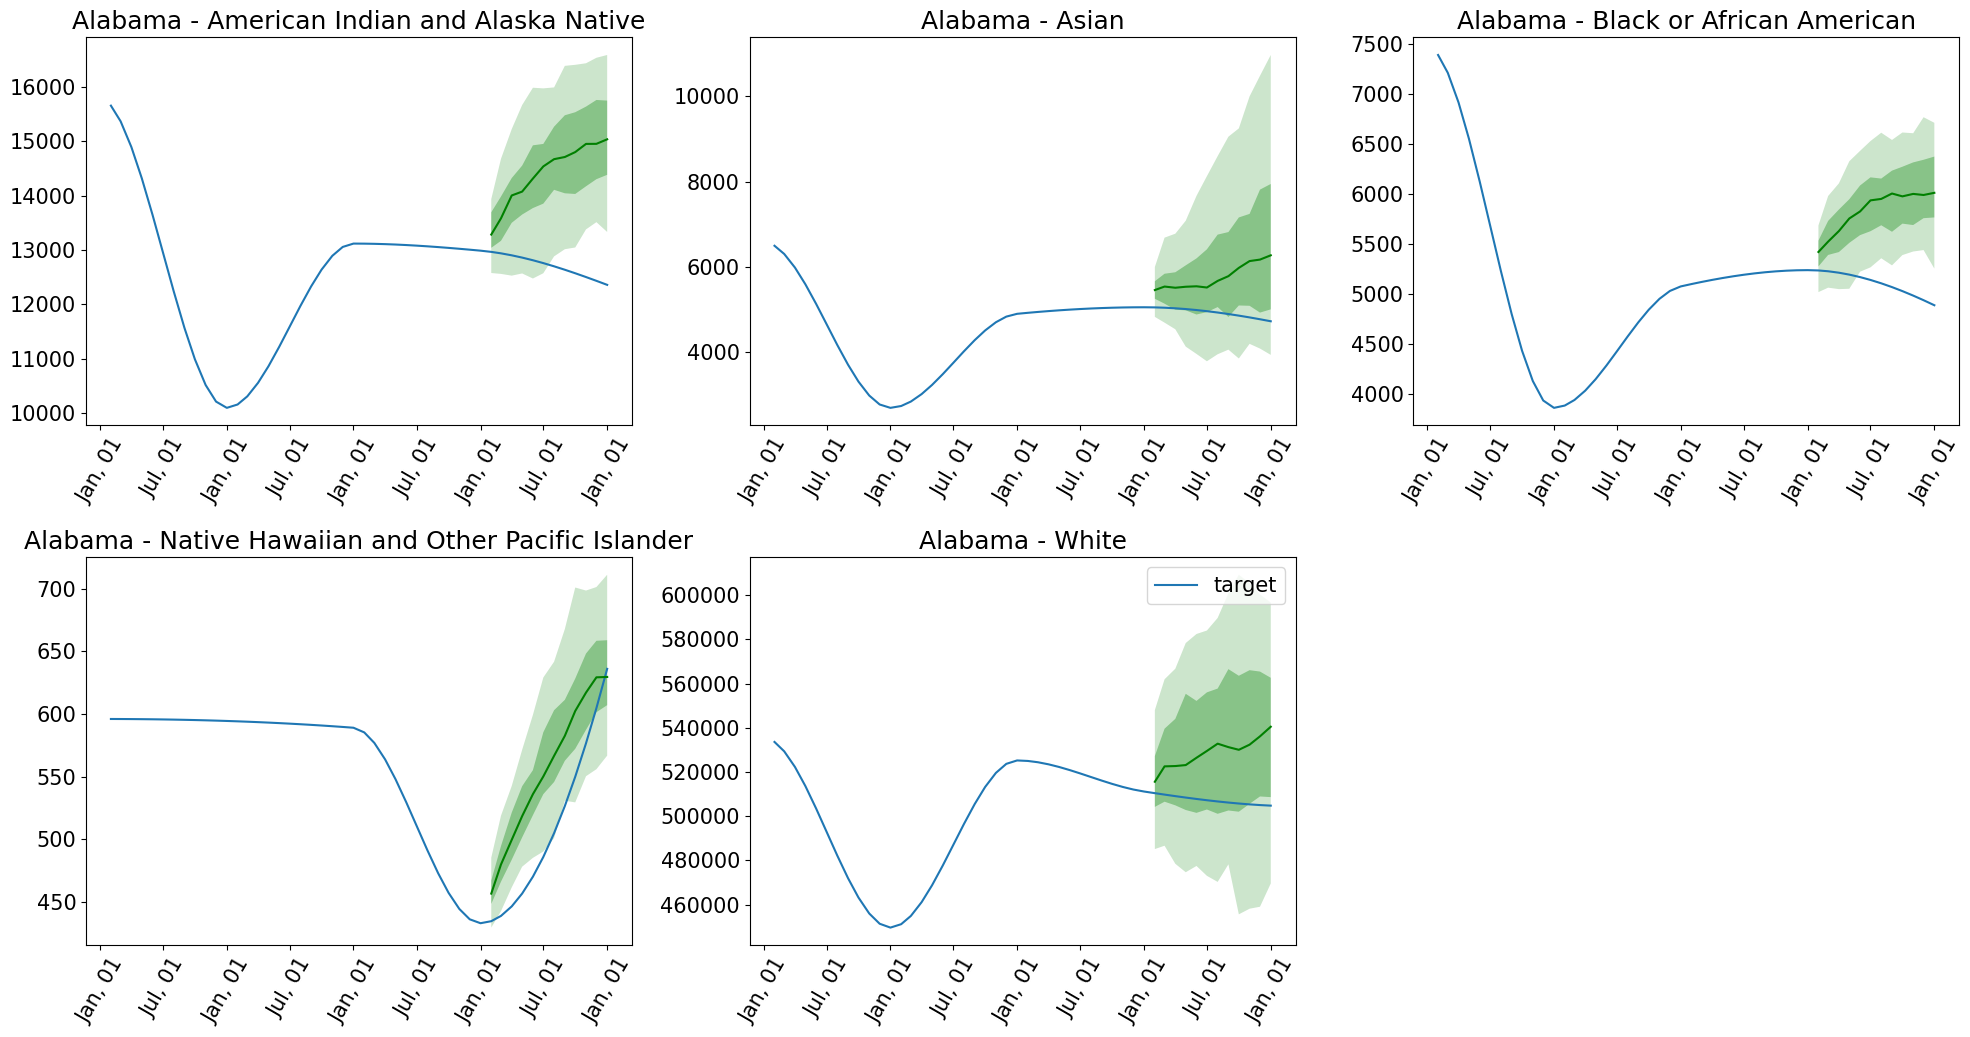

RMSE and MSE for California:
Race: American Indian and Alaska Native, RMSE: 1846.9305, MSE: 3411152.4269
Race: Asian, RMSE: 1151.6449, MSE: 1326285.9698
Race: Black or African American, RMSE: 793.8063, MSE: 630128.4982
Race: Native Hawaiian and Other Pacific Islander, RMSE: 53.7828, MSE: 2892.5878
Race: White, RMSE: 23392.2578, MSE: 547197725.5665


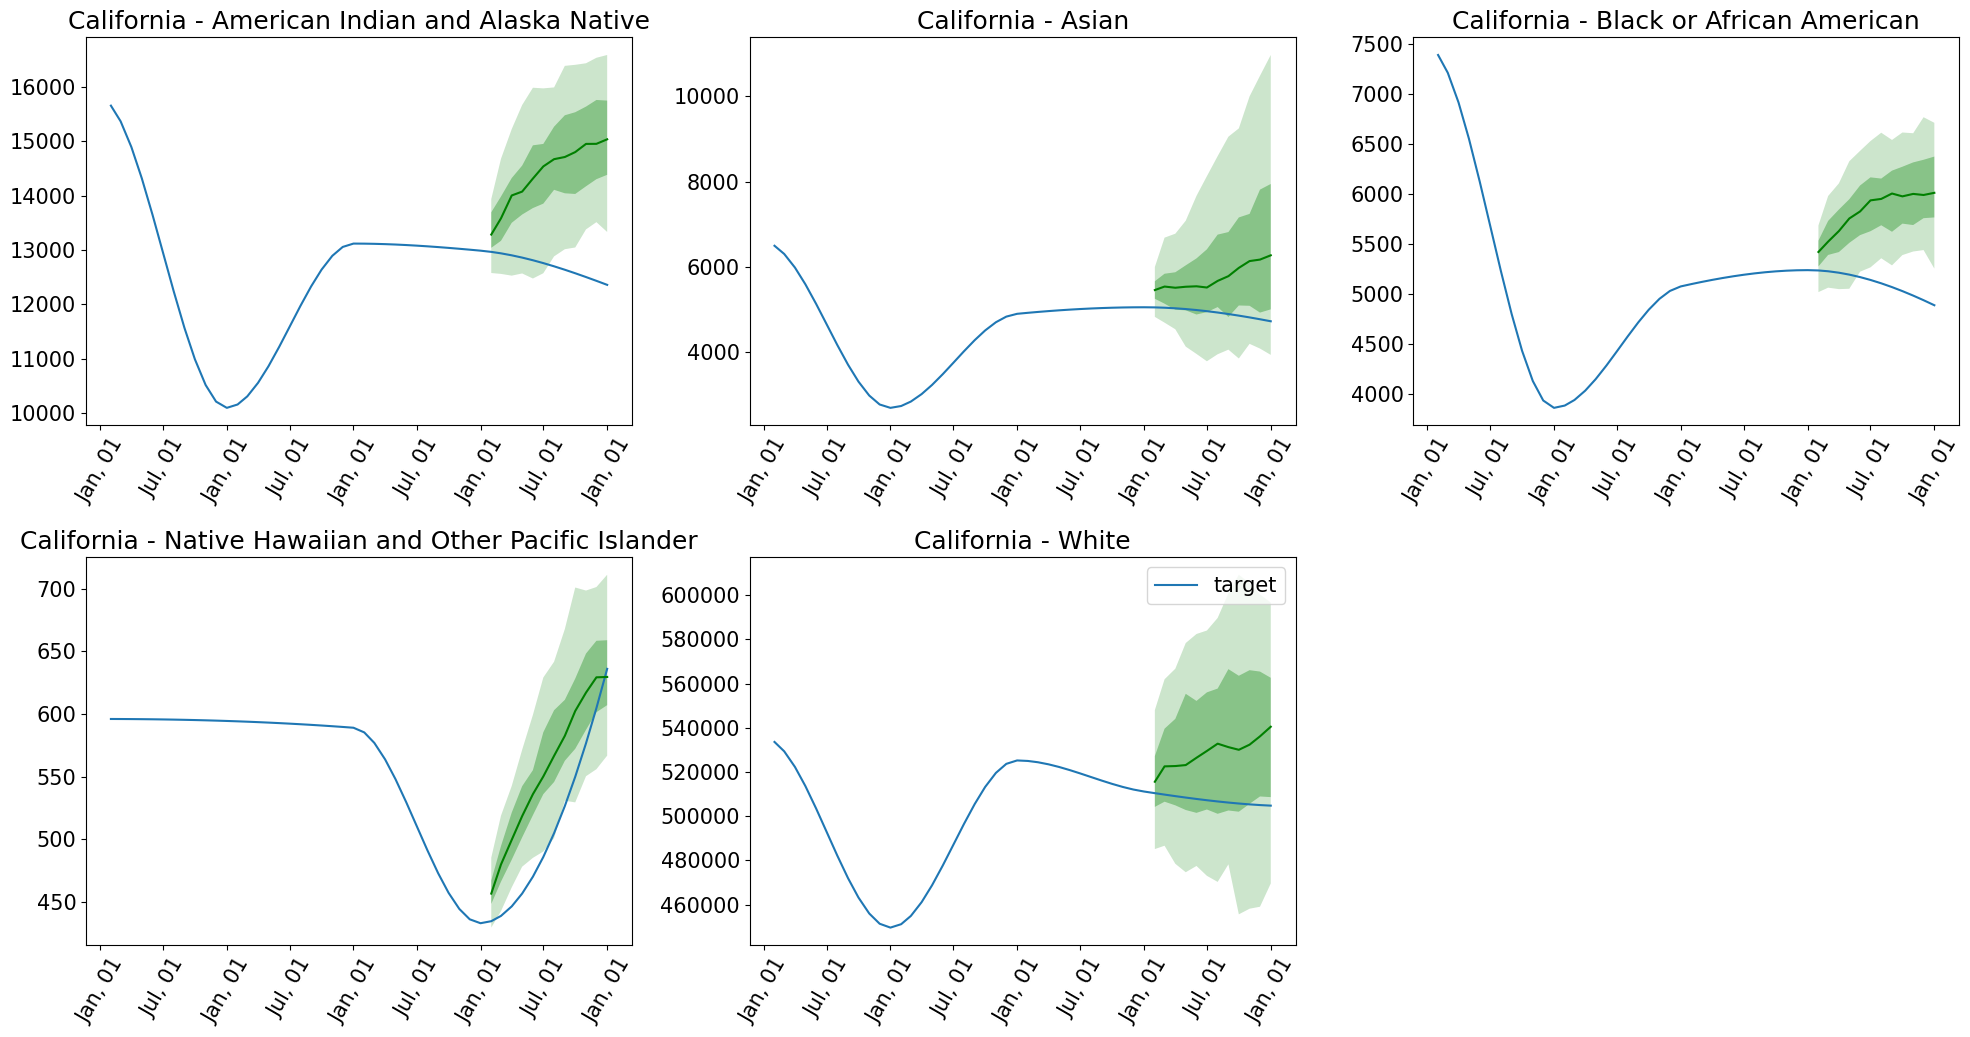

RMSE and MSE for Texas:
Race: American Indian and Alaska Native, RMSE: 1846.9305, MSE: 3411152.4269
Race: Asian, RMSE: 1151.6449, MSE: 1326285.9698
Race: Black or African American, RMSE: 793.8063, MSE: 630128.4982
Race: Native Hawaiian and Other Pacific Islander, RMSE: 53.7828, MSE: 2892.5878
Race: White, RMSE: 23392.2578, MSE: 547197725.5665


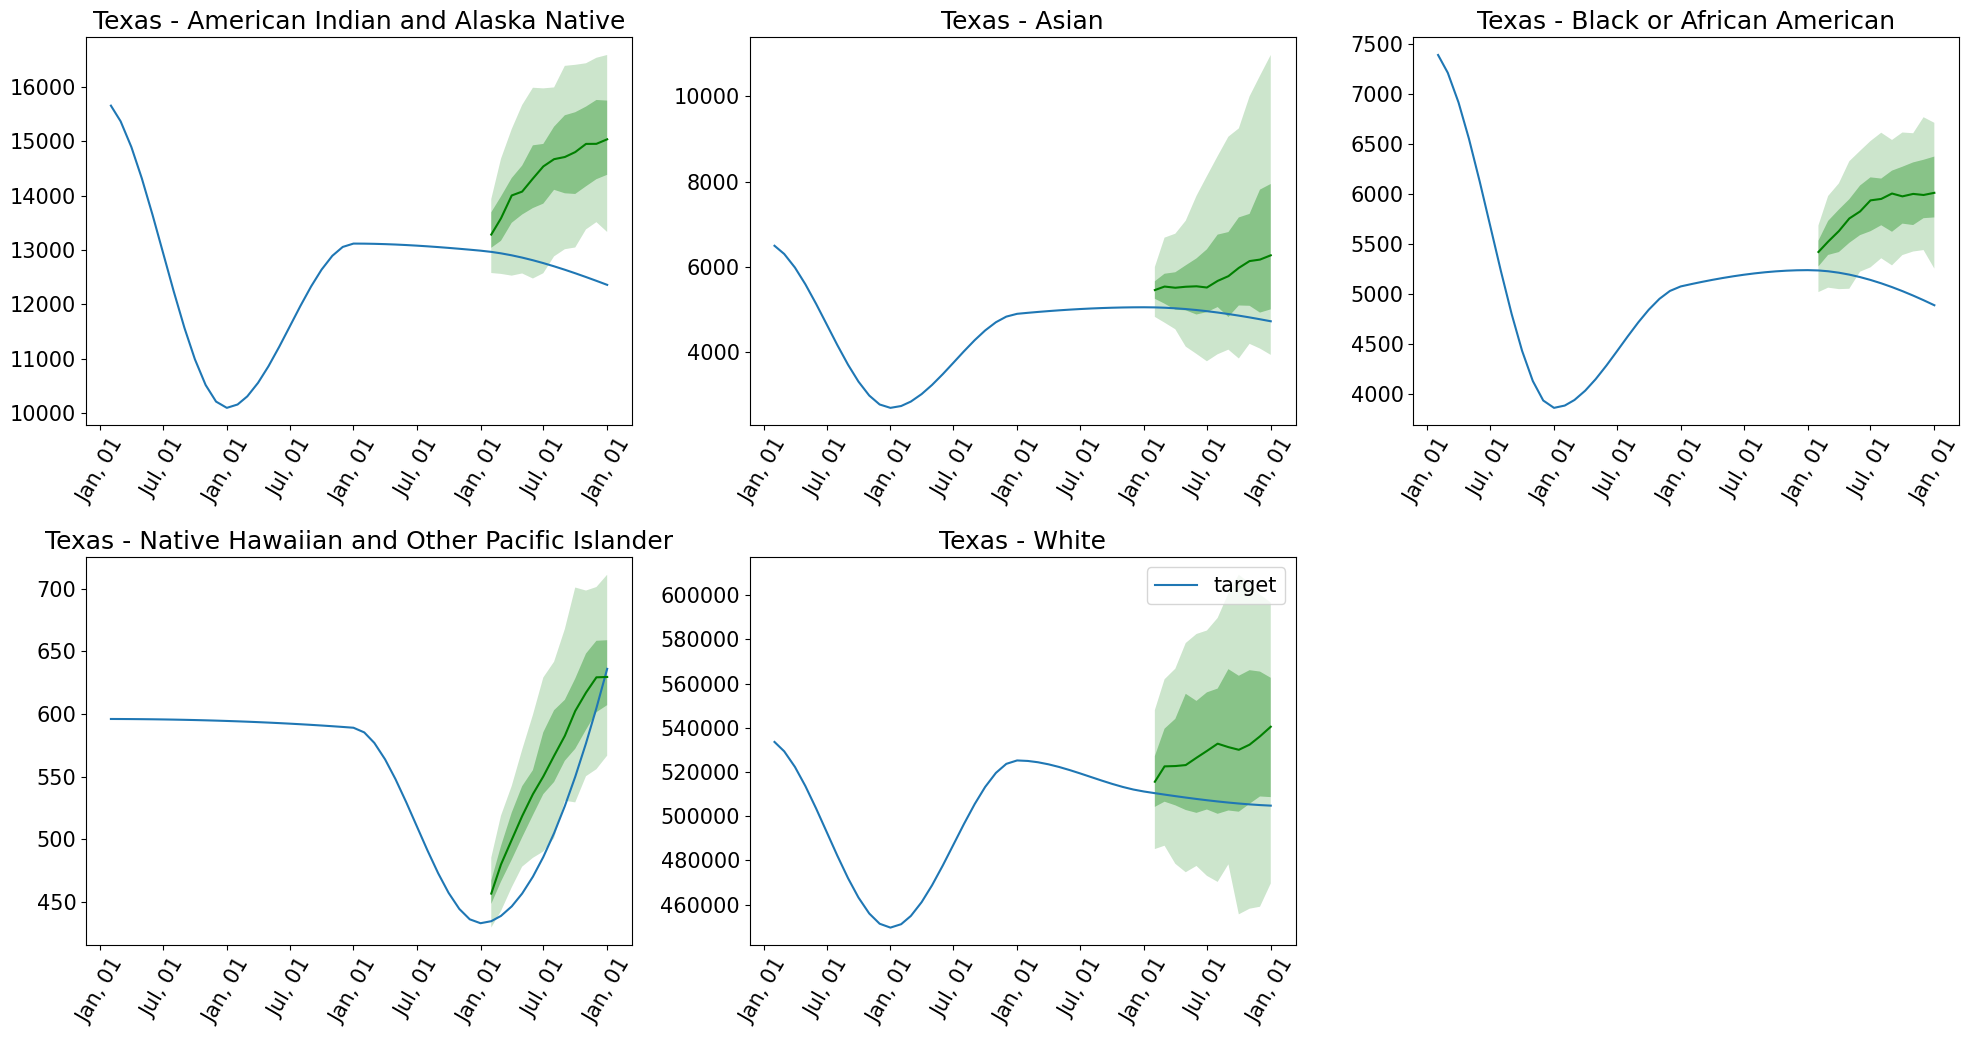

RMSE and MSE for NewYork:
Race: American Indian and Alaska Native, RMSE: 1846.9305, MSE: 3411152.4269
Race: Asian, RMSE: 1151.6449, MSE: 1326285.9698
Race: Black or African American, RMSE: 793.8063, MSE: 630128.4982
Race: Native Hawaiian and Other Pacific Islander, RMSE: 53.7828, MSE: 2892.5878
Race: White, RMSE: 23392.2578, MSE: 547197725.5665


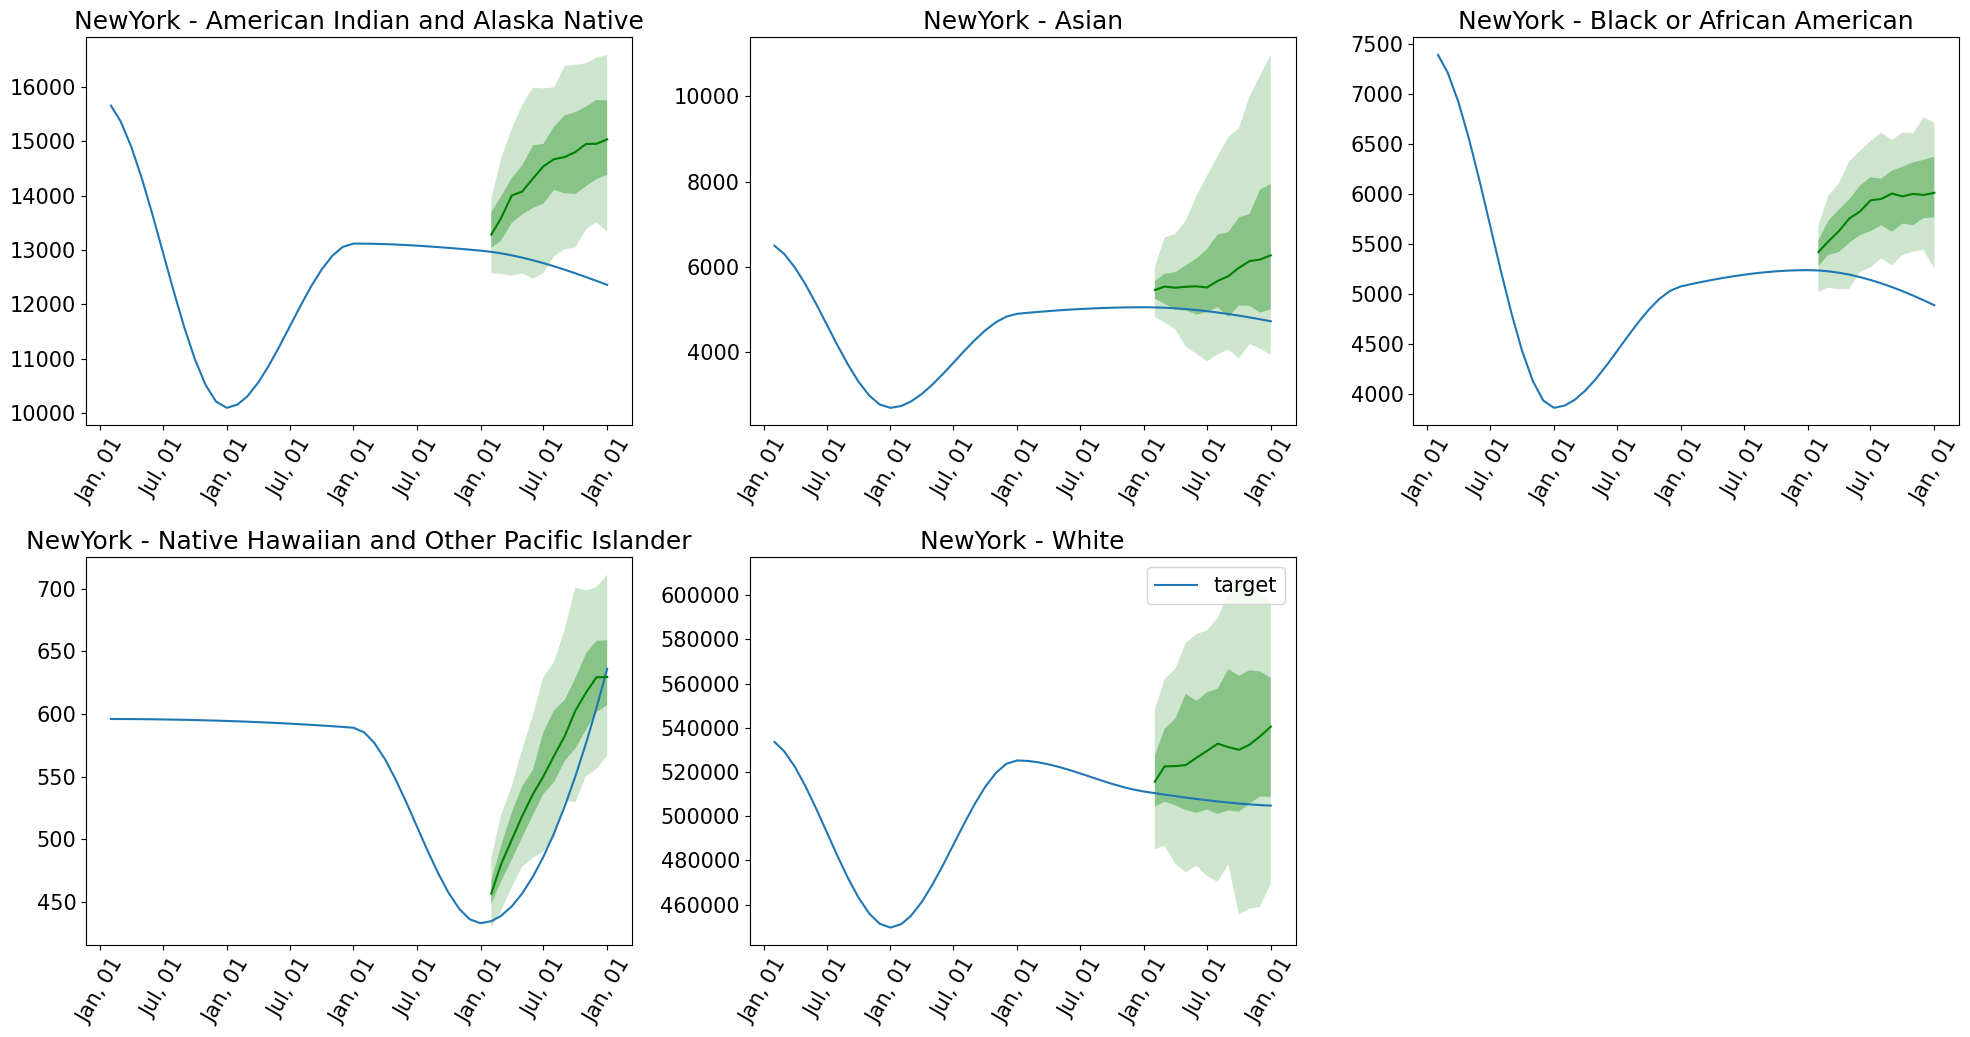

RMSE and MSE for Hawaii:
Race: American Indian and Alaska Native, RMSE: 1846.9305, MSE: 3411152.4269
Race: Asian, RMSE: 1151.6449, MSE: 1326285.9698
Race: Black or African American, RMSE: 793.8063, MSE: 630128.4982
Race: Native Hawaiian and Other Pacific Islander, RMSE: 53.7828, MSE: 2892.5878
Race: White, RMSE: 23392.2578, MSE: 547197725.5665


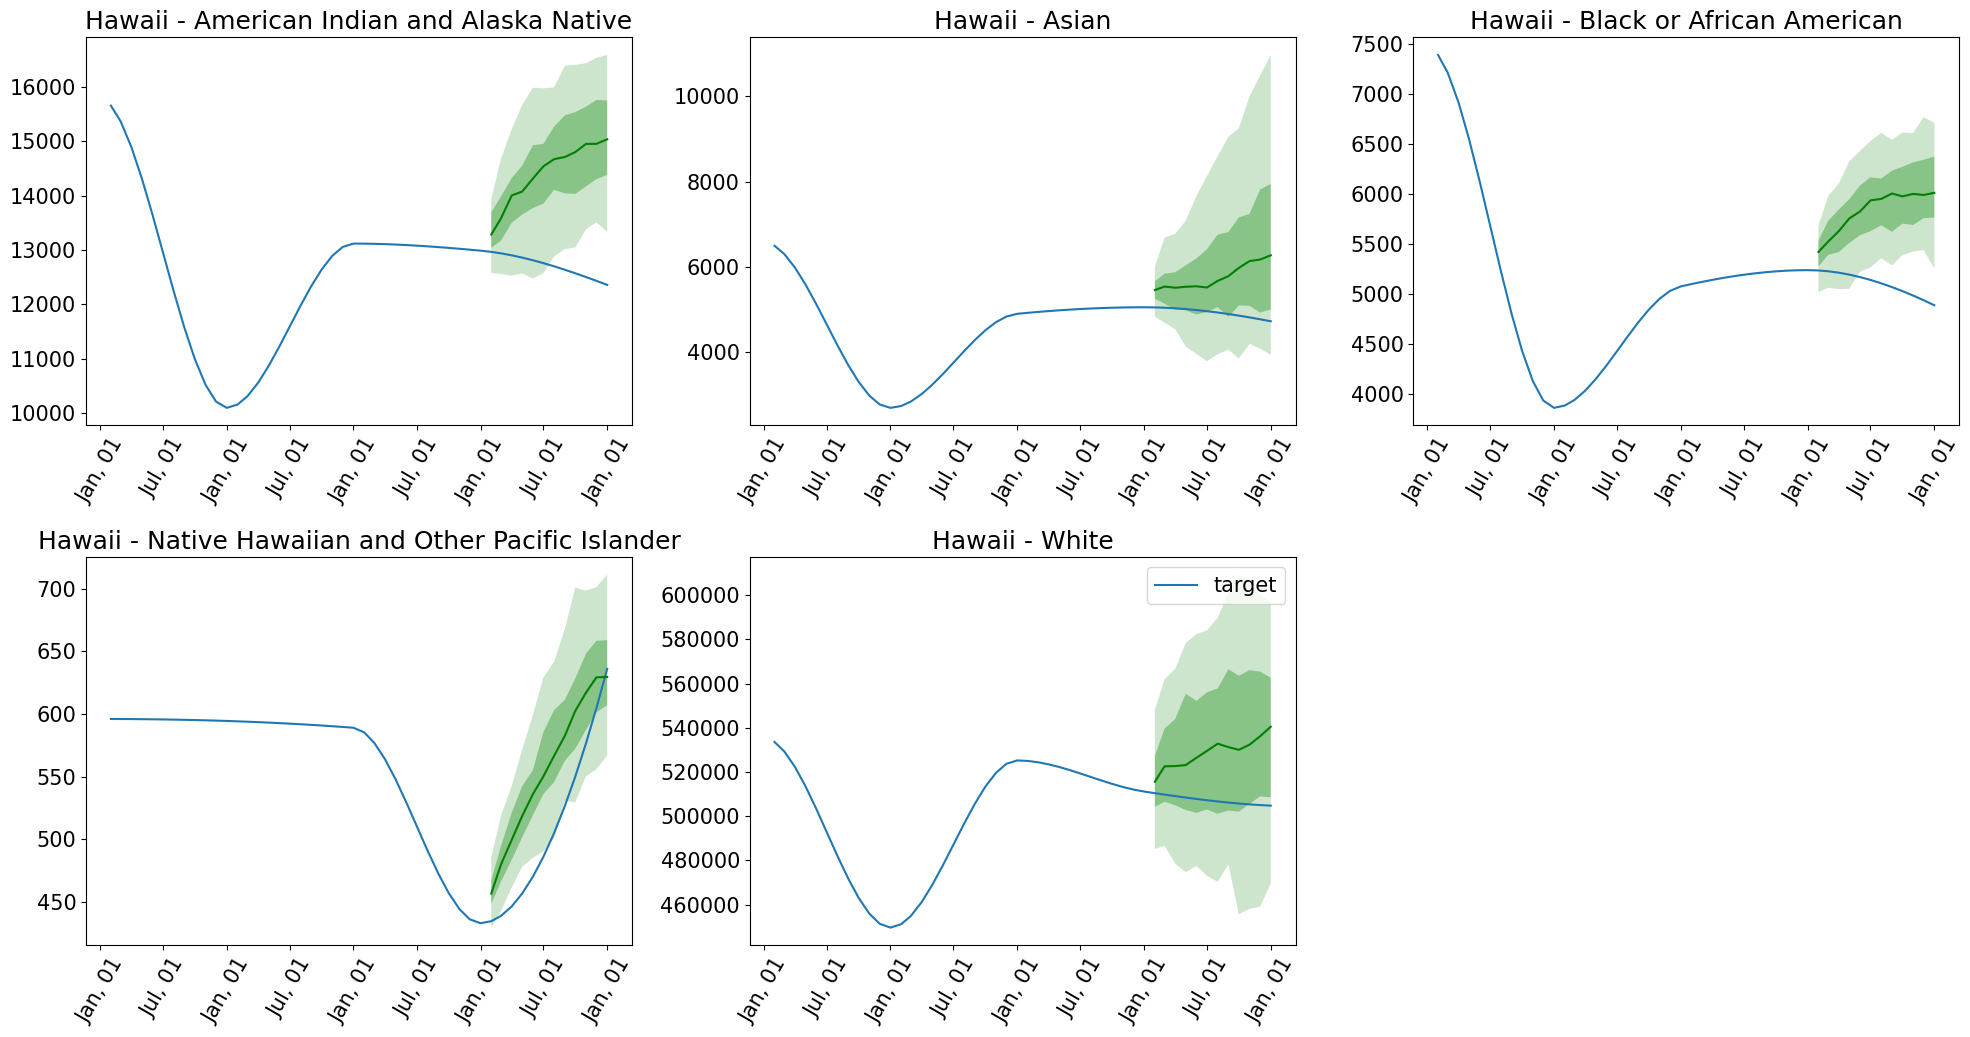

RMSE and MSE for Wyoming:
Race: American Indian and Alaska Native, RMSE: 1846.9305, MSE: 3411152.4269
Race: Asian, RMSE: 1151.6449, MSE: 1326285.9698
Race: Black or African American, RMSE: 793.8063, MSE: 630128.4982
Race: Native Hawaiian and Other Pacific Islander, RMSE: 53.7828, MSE: 2892.5878
Race: White, RMSE: 23392.2578, MSE: 547197725.5665


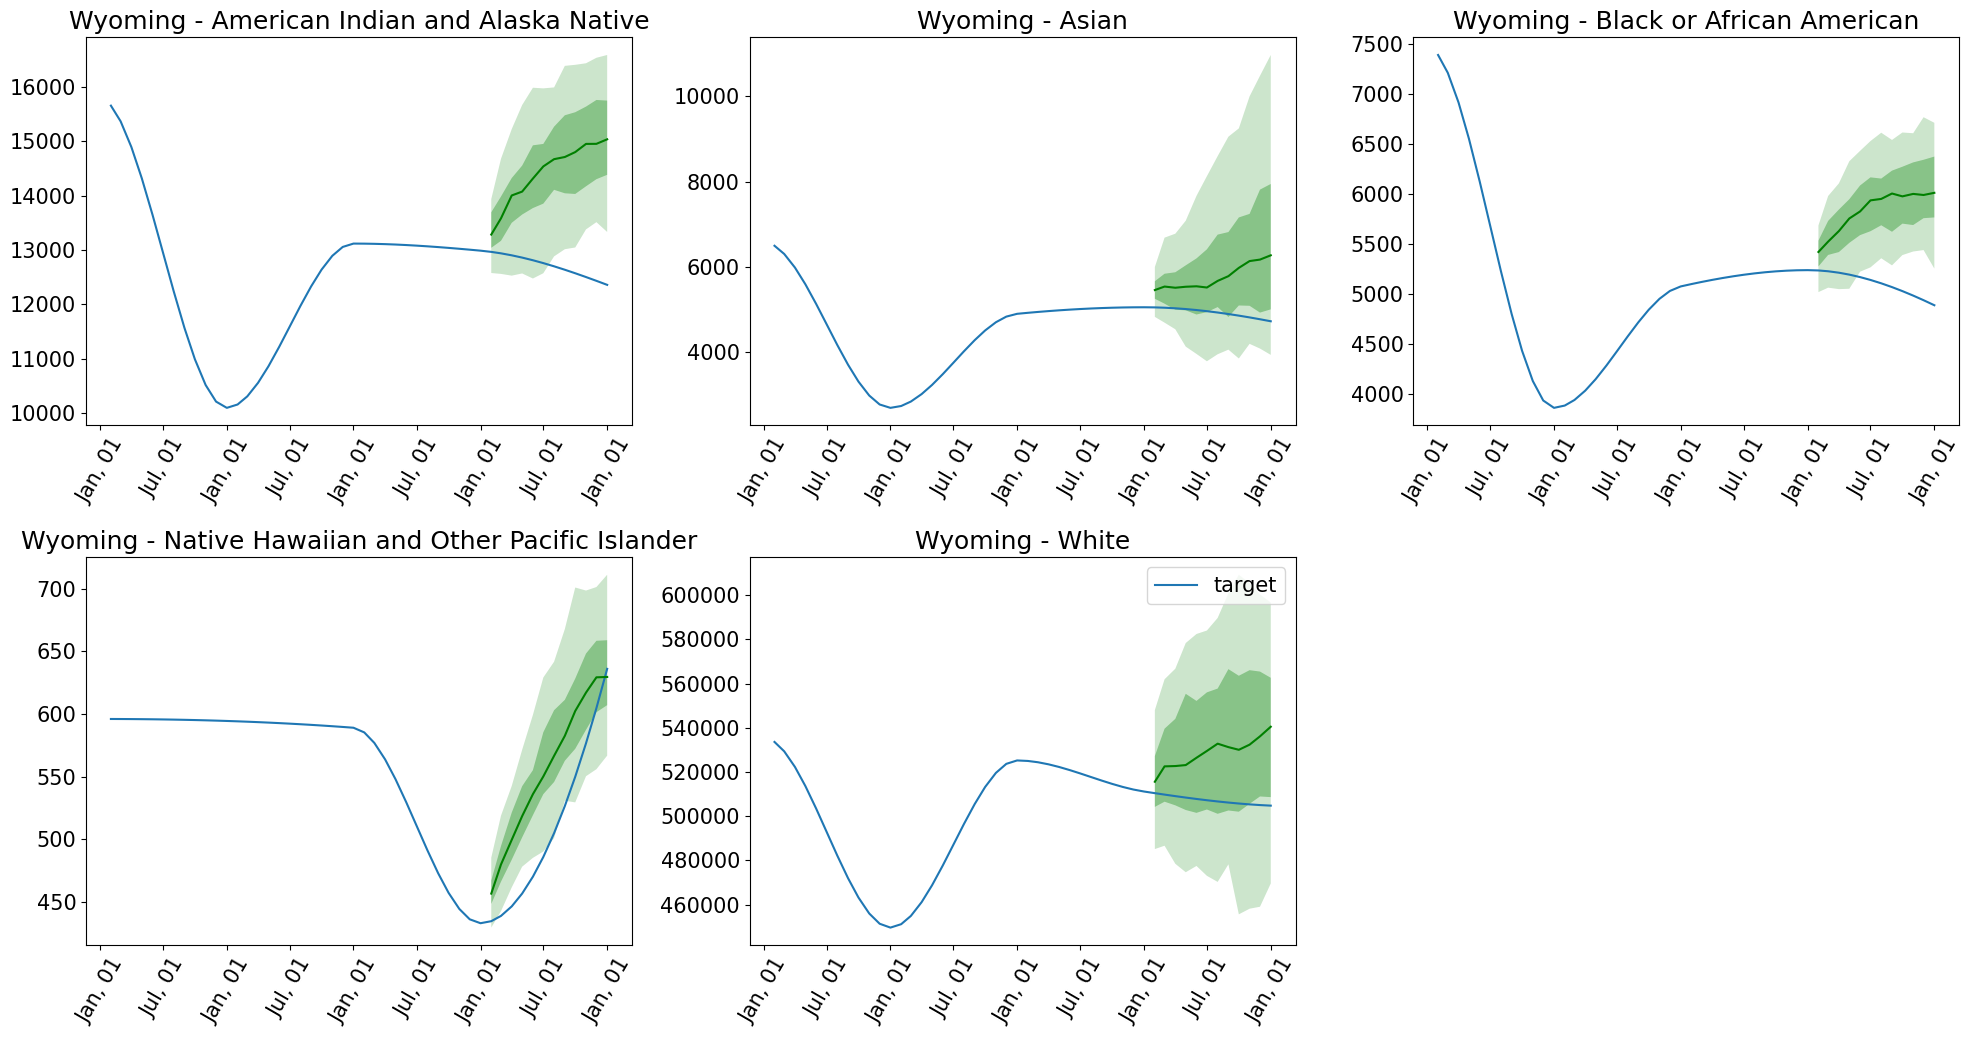

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to compute RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))



# Plot results for each state
for state in states:
    if state in datasets:
        dataset = datasets[state]
        #forecasts, tss = get_lag_llama_predictions(dataset, prediction_length=12, device=torch.device("cpu"))

        plt.figure(figsize=(20, 15))
        date_formater = mdates.DateFormatter('%b, %d')
        plt.rcParams.update({'font.size': 15})  # Fixed syntax error

        print(f"RMSE and MSE for {state}:")
        for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
            ax = plt.subplot(3, 3, idx + 1)
            # Plot actual data and forecasts
            plt.plot(ts[-4 * 12:].to_timestamp(), label="target")
            forecast.plot(color='g')
            plt.xticks(rotation=60)
            ax.xaxis.set_major_formatter(date_formater)

            # Extract actual and forecasted values for RMSE
            actual_values = ts[-forecast.prediction_length:].to_numpy()
            forecast_values = forecast.mean

            # Compute RMSE and MSE
            rmse = calculate_rmse(actual_values, forecast_values)
            mse = rmse ** 2

            # Extract race name
            race_name = forecast.item_id  # Assuming forecast contains item_id

            # Print RMSE and MSE
            print(f"Race: {race_name}, RMSE: {rmse:.4f}, MSE: {mse:.4f}")
            print(forecast_values)

            # Set title with format "State - Race"
            ax.set_title(f"{state} - {race_name}")

        plt.gcf().tight_layout()
        plt.legend()
        plt.show()


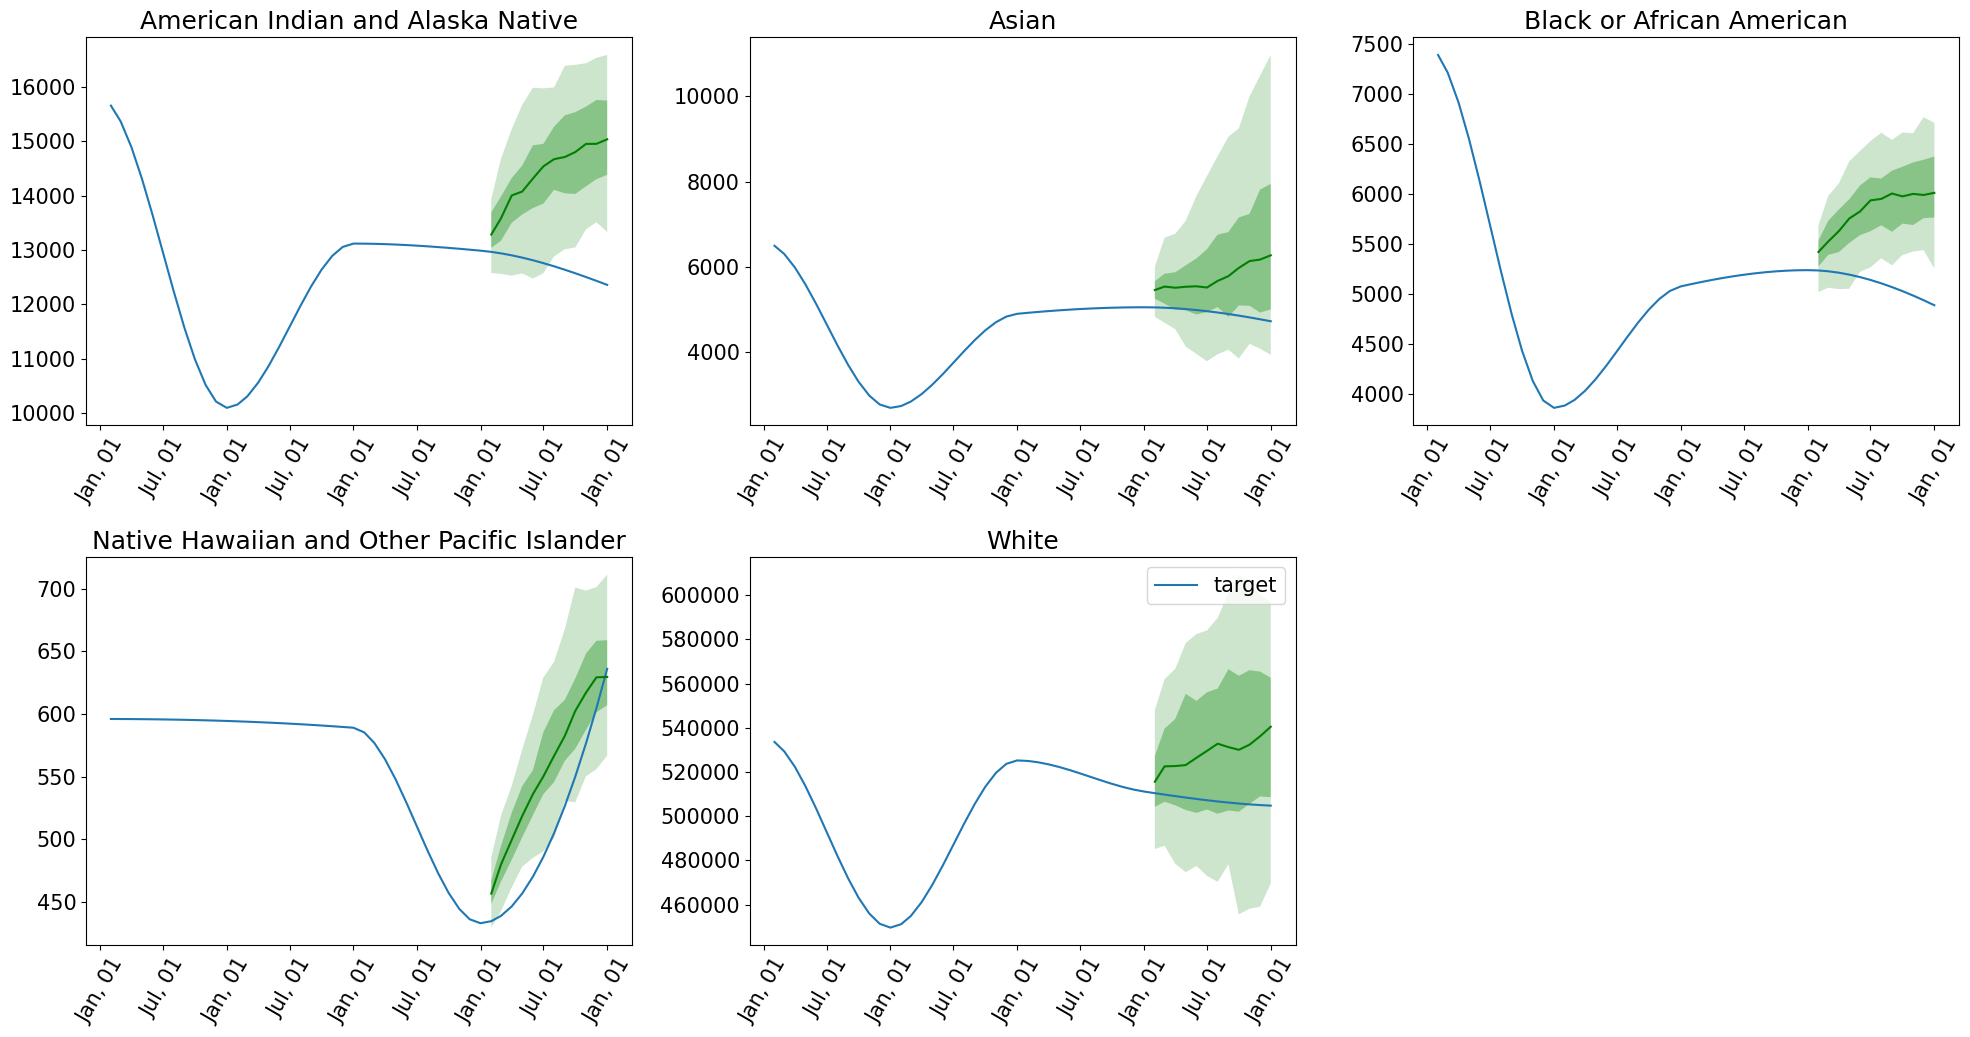

In [ ]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

# Iterate through the first 9 series, and plot the predicted samples
for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)

    plt.plot(ts[-4 * prediction_length:].to_timestamp(), label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

Fine Tuning forloop

/usr/local/lib/python3.10/dist-packages/lightning/fabric/utilities/cloud_io.py:56: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
INFO: GPU available: True (cuda), used: True
INFO:lightning.p

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 9.91771 (best 9.91771), saving model to '/content/lag-llama/lightning_logs/version_2/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 9.91771 (best 9.91771), saving model to '/content/lag-llama/lightning_logs/version_2/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 9.04398 (best 9.04398), saving model to '/content/lag-llama/lightning_logs/version_2/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' reached 9.04398 (best 9.04398), saving model to '/content/lag-llama/lightning_logs/version_2/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO: Epoch 2, global step 150: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 150: 'train_loss' was not in top 1
INFO: Epoch 3, global step 200: 'train_lo

Forecasting batches:   0%|          | 0/5 [00:00<?, ?it/s]

Ground truth:   0%|          | 0/5 [00:00<?, ?it/s]

RMSE and MSE for Wyoming:
Race: American Indian and Alaska Native, RMSE: 240.2973, MSE: 57742.8155
Forecast vlaues
[12820.242 12713.607 12653.269 12598.731 12535.389 12489.24  12416.264
 12342.238 12275.17  12266.225 12276.588 12266.572]
Race: Asian, RMSE: 43.3862, MSE: 1882.3587
Forecast vlaues
[5064.6157 5100.603  5055.5723 5047.0996 5033.3975 5002.94   4971.8813
 4908.152  4886.8047 4859.3145 4813.668  4697.545 ]
Race: Black or African American, RMSE: 39.2445, MSE: 1540.1280
Forecast vlaues
[5233.176  5202.0923 5180.8677 5165.089  5131.9204 5092.986  5056.938
 5029.969  5004.4067 4987.1724 4970.8154 4960.3745]
Race: Native Hawaiian and Other Pacific Islander, RMSE: 15.2193, MSE: 231.6263
Forecast vlaues
[435.5264  442.35587 449.32    462.22247 477.1949  494.3305  513.49603
 533.10114 552.07654 568.38904 581.4804  592.661  ]
Race: White, RMSE: 8728.9697, MSE: 76194912.4872
Forecast vlaues
[509848.44 508861.12 507293.53 505439.97 504007.8  502592.56 499396.3
 496454.6  494480.16 49280

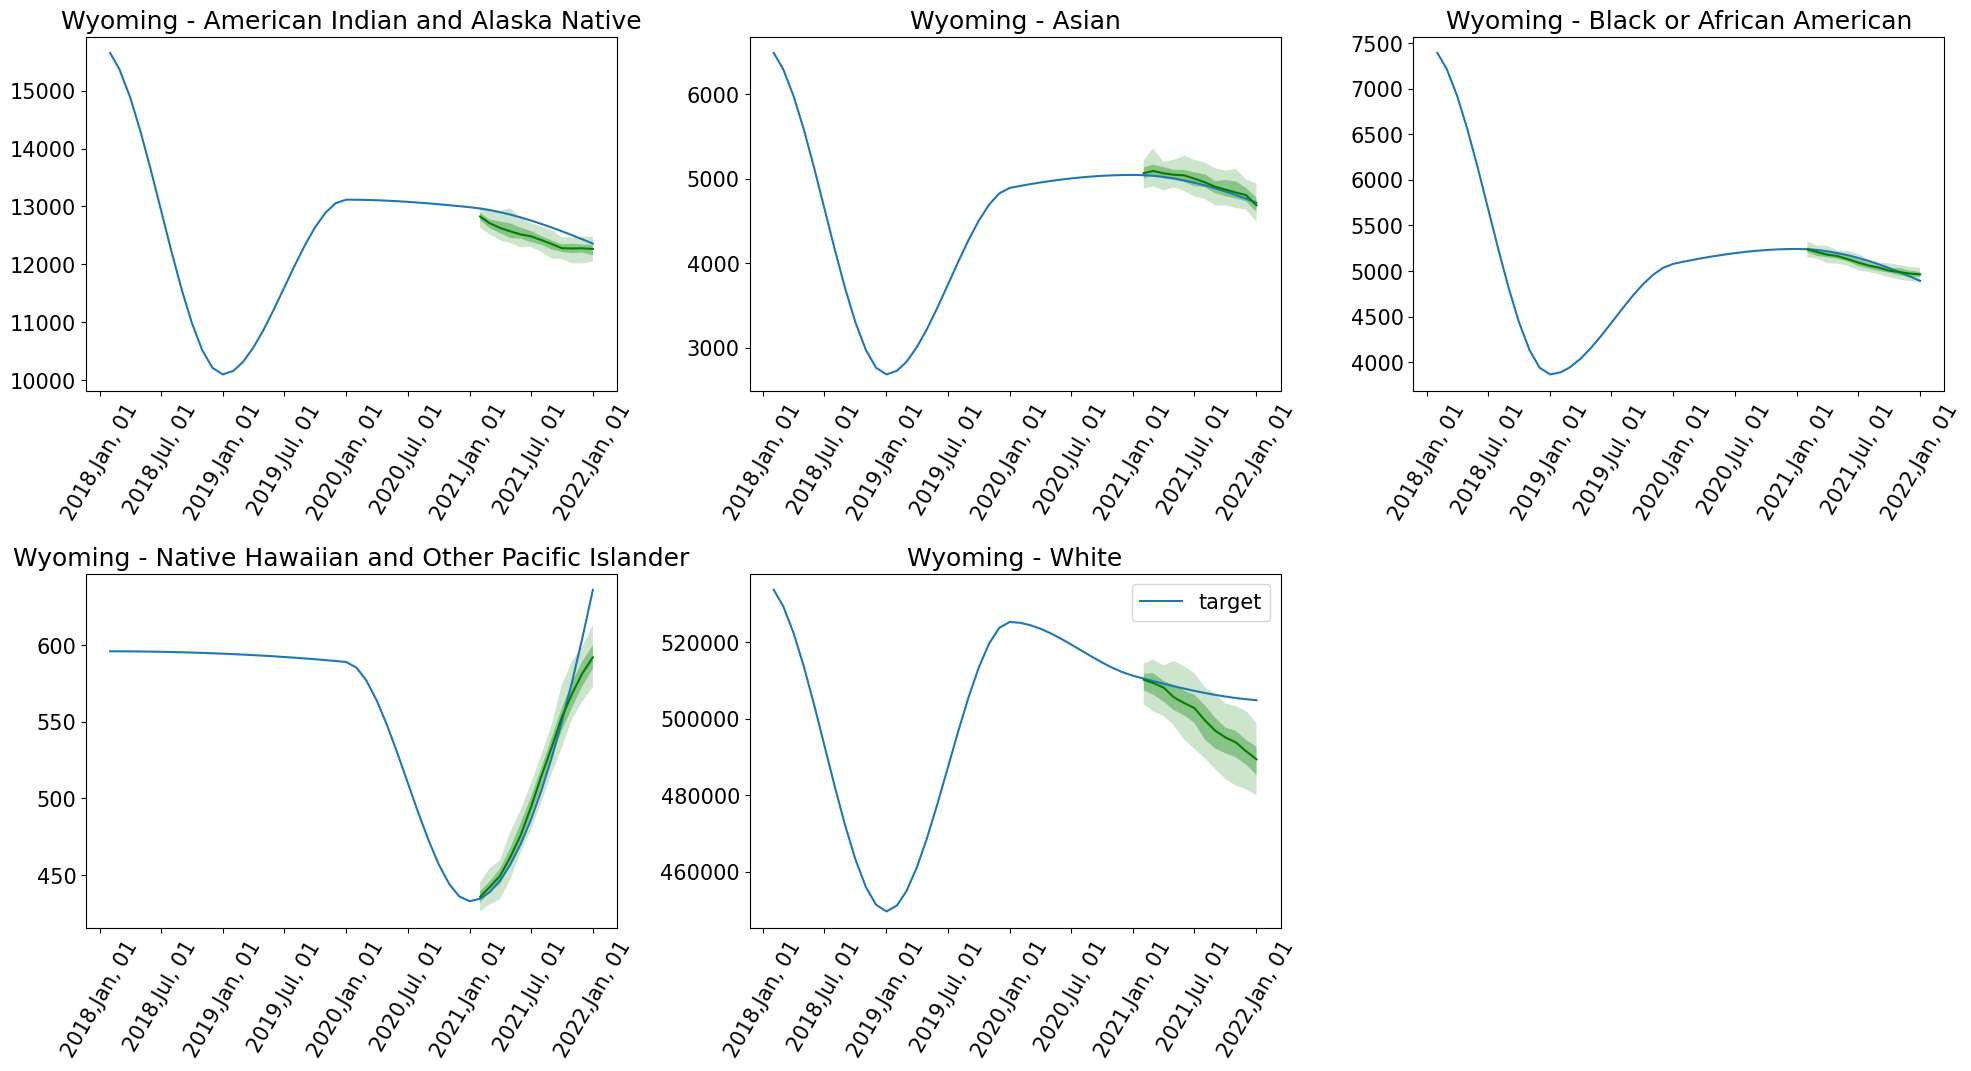

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from tqdm.autonotebook import tqdm


# Function to compute RMSE
def calculate_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))

# Plot results for each state
states = ["Wyoming"]

for state in states:
    if state in datasets:
        dataset = datasets[state]
        train_dataset = train_datasets[state]

        predictor = estimator.train(train_dataset, cache_data=True, shuffle_buffer_length=1000)
        forecast_it, ts_it = make_evaluation_predictions(
        dataset=train_dataset,
        predictor=predictor,
        num_samples=num_samples
    )
        forecasts = list(tqdm(forecast_it, total=len(dataset), desc="Forecasting batches"))
        tss = list(tqdm(ts_it, total=len(dataset), desc="Ground truth"))


        plt.figure(figsize=(20, 15))
        date_formater = mdates.DateFormatter('%Y,%b, %d')
        plt.rcParams.update({'font.size': 15})  # Fixed syntax error

        print(f"RMSE and MSE for {state}:")
        for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
            ax = plt.subplot(3, 3, idx + 1)
            # Plot actual data and forecasts
            plt.plot(ts[-4 * 12:].to_timestamp(), label="target")
            forecast.plot(color='g')
            plt.xticks(rotation=60)
            ax.xaxis.set_major_formatter(date_formater)

            # Extract actual and forecasted values for RMSE
            actual_values = ts[-forecast.prediction_length:].to_numpy()
            forecast_values = forecast.mean

            # Compute RMSE and MSE
            rmse = calculate_rmse(actual_values, forecast_values)
            mse = rmse ** 2

            # Extract race name
            race_name = forecast.item_id  # Assuming forecast contains item_id

            # Print RMSE and MSE
            print(f"Race: {race_name}, RMSE: {rmse:.4f}, MSE: {mse:.4f}")
            print("Forecast vlaues")
            print(forecast_values)

            # Set title with format "State - Race"
            ax.set_title(f"{state} - {race_name}")


        plt.gcf().tight_layout()
        plt.legend()
        plt.show()
